In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras import losses

In [2]:
eeg_data_info = pd.read_csv("D:\Project Model\Datasets\dataset\eda_data_info.csv")

In [3]:
min_value = eeg_data_info['MeanTheta'].min()
max_value = eeg_data_info['MeanTheta'].max()
eeg_data_info['MeanNormalized'] = (eeg_data_info['MeanTheta'] - min_value) / (max_value - min_value)
eeg_data_info['MeanNormalized'] = eeg_data_info['MeanNormalized'].round(2)
eeg_data_info['Confusion_score'] = eeg_data_info['MeanNormalized'].round(1)

In [4]:
def categorized(value):
    if value <= 0.33:
        return 0
    elif value > 0.33 and value <= 0.66:
        return 1
    else:
        return 2
eeg_data_info['Category'] = eeg_data_info['MeanNormalized'].apply(categorized)

In [5]:
eeg_data_info

,SubjectID,Age,Ethnicity,Gender,VideoID,Attention,Mediation,Raw,Delta,Theta,...,Beta2,Gamma1,Gamma2,predefinedlabel,user-definedlabeln,Sample,MeanTheta,MeanNormalized,Confusion_score,Category
0,0,25,0,1,0.0,56.0,43.0,278.0,301963.0,90612.0,...,45097.0,33228.0,8293.0,0.0,0.0,0.5,124965.590278,0.33,0.3,0
1,0,25,0,1,0.0,40.0,35.0,-50.0,73787.0,28083.0,...,3687.0,5293.0,2740.0,0.0,0.0,1.5,124965.590278,0.33,0.3,0
2,0,25,0,1,0.0,47.0,48.0,101.0,758353.0,383745.0,...,130536.0,57243.0,25354.0,0.0,0.0,2.5,124965.590278,0.33,0.3,0
3,0,25,0,1,0.0,47.0,57.0,-5.0,2012240.0,129350.0,...,62462.0,49960.0,33932.0,0.0,0.0,3.5,124965.590278,0.33,0.3,0
4,0,25,0,1,0.0,44.0,53.0,-8.0,1005145.0,354328.0,...,99603.0,44790.0,29749.0,0.0,0.0,4.5,124965.590278,0.33,0.3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11531,9,24,0,0,9.0,64.0,38.0,-39.0,127574.0,9951.0,...,39728.0,2598.0,960.0,1.0,0.0,12806.5,162498.680328,0.43,0.4,1
11532,9,24,0,0,9.0,61.0,35.0,-275.0,323061.0,797464.0,...,571280.0,36574.0,10010.0,1.0,0.0,12807.5,162498.680328,0.43,0.4,1
11533,9,24,0,0,9.0,60.0,29.0,-426.0,680989.0,154296.0,...,26975.0,20427.0,2024.0,1.0,0.0,12808.5,162498.680328,0.43,0.4,1
11534,9,24,0,0,9.0,60.0,29.0,-84.0,366269.0,27346.0,...,3283.0,12323.0,1764.0,1.0,0.0,12809.5,162498.680328,0.43,0.4,1


In [6]:
columns_to_keep = ['MeanNormalized','Delta','Theta']
X = eeg_data_info.drop(eeg_data_info.columns.difference(columns_to_keep), axis=1)
y = eeg_data_info['Category']

In [7]:
print(X,y)

           Delta      Theta  MeanNormalized
0       301963.0    90612.0            0.33
1        73787.0    28083.0            0.33
2       758353.0   383745.0            0.33
3      2012240.0   129350.0            0.33
4      1005145.0   354328.0            0.33
...          ...        ...             ...
11531   127574.0     9951.0            0.43
11532   323061.0   797464.0            0.43
11533   680989.0   154296.0            0.43
11534   366269.0    27346.0            0.43
11535  1164555.0  1184366.0            0.43

[11536 rows x 3 columns] 0        0
1        0
2        0
3        0
4        0
        ..
11531    1
11532    1
11533    1
11534    1
11535    1
Name: Category, Length: 11536, dtype: int64


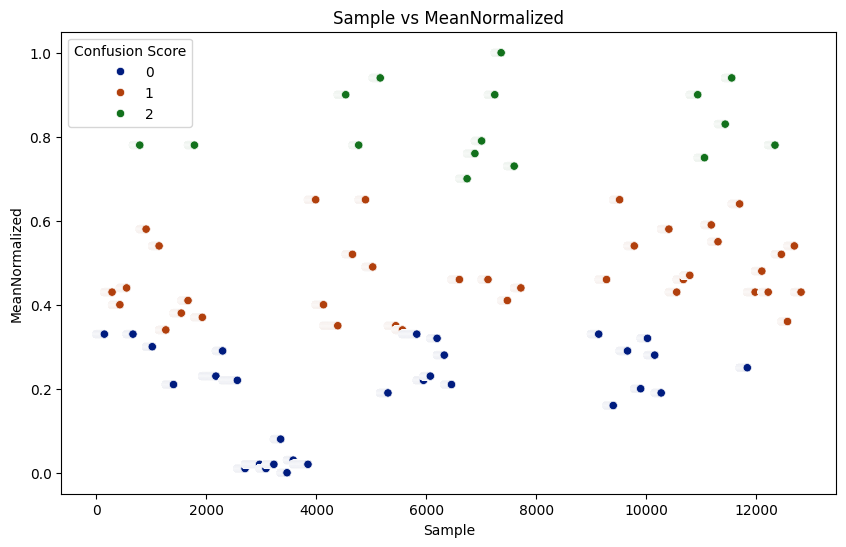

In [8]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Sample', y='MeanNormalized', hue='Category', data=eeg_data_info, palette='dark')

plt.title('Sample vs MeanNormalized')
plt.xlabel('Sample')
plt.ylabel('MeanNormalized')
plt.legend(title='Confusion Score')
plt.show()

In [9]:
print(X.shape)
print(y.shape)

(11536, 3)
(11536,)


In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

(8075, 3) (8075,)
(3461, 3) (3461,)


In [11]:
# # Assuming you have 3 classes in your target variable

# num_samples_train = X_train.shape[0]
# num_samples_test = X_test.shape[0]
# num_features = 3

# # Reshape X_train and X_test
# X_train = X_train.values.reshape(num_samples_train, 1, num_features)
# X_test = X_test.values.reshape(num_samples_test, 1, num_features)
# print(X_train.shape)
# print(X_test.shape)

# # Build the LSTM model
# model = Sequential()
# model.add(LSTM(32, input_shape=(1,num_features)))
# model.add(Dense(3, activation='softmax'))  # Adjusted output dimension and activation

# # Compile the model
# model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# # Train the model
# history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

# # Plot the learning curves
# plt.figure(figsize=(10, 5))
# plt.plot(history.history['loss'], label='Training Loss')
# plt.plot(history.history['val_loss'], label='Testing Loss')
# plt.title('Model Loss')
# plt.xlabel('Epochs')
# plt.ylabel('Loss')
# plt.legend()
# plt.show()

# plt.figure(figsize=(10, 5))
# plt.plot(history.history['accuracy'], label='Training Accuracy')
# plt.plot(history.history['val_accuracy'], label='Testing Accuracy')
# plt.title('Model Accuracy')
# plt.xlabel('Epochs')
# plt.ylabel('Accuracy')
# plt.legend()
# plt.show()

# # Evaluate the model on the test data
# loss, accuracy = model.evaluate(X_test, y_test)
# print(f"Test loss: {loss*100:.4f}, Test accuracy: {accuracy*100:.4f}")


Epoch 1/50
253/253 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.4112 - loss: 1.1152 - val_accuracy: 0.5331 - val_loss: 0.9966
Epoch 2/50
253/253 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5388 - loss: 0.9962 - val_accuracy: 0.5302 - val_loss: 0.9919
Epoch 3/50
253/253 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5237 - loss: 0.9940 - val_accuracy: 0.5331 - val_loss: 0.9851
Epoch 4/50
253/253 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5245 - loss: 0.9958 - val_accuracy: 0.5325 - val_loss: 0.9900
Epoch 5/50
253/253 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5325 - loss: 0.9862 - val_accuracy: 0.5293 - val_loss: 0.9813
Epoch 6/50
253/253 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5354 - loss: 0.9780 - val_accuracy: 0.5302 - val_loss: 0.9810
Epoch 7/50
253/253 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5353 - loss: 0.9843 - val_accuracy: 0.5328 - val_loss: 0.9823
Epoch 8/50
253/253 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5296 - loss: 0.9789 - val_accuracy: 0.

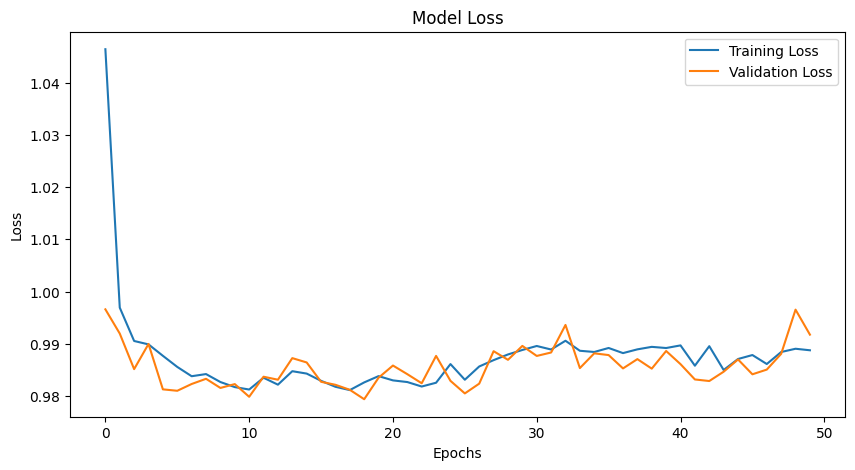

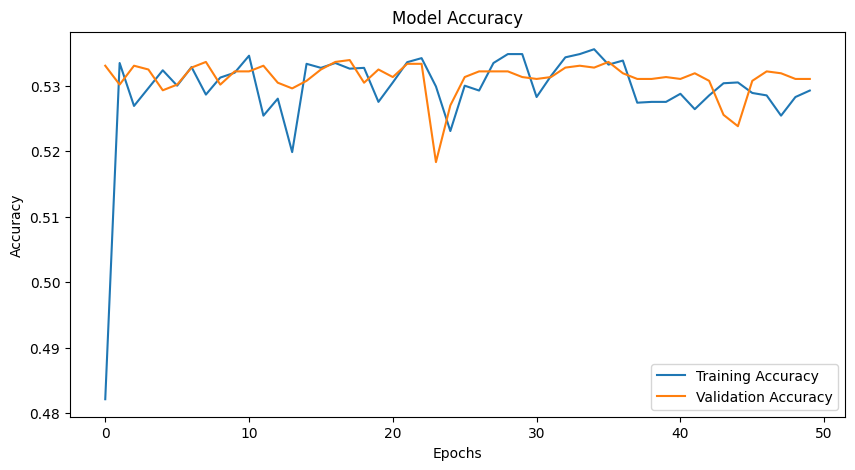

109/109 ━━━━━━━━━━━━━━━━━━━━ 0s 698us/step - accuracy: 0.5415 - loss: 0.9826
Test loss: 0.9917, Test accuracy: 0.5311


In [16]:
# Build the LSTM model
model = Sequential()
model.add(LSTM(32, input_shape=(3,3)))
model.add(Dense(3, activation='softmax'))  # Assuming confusion_score is binary (0 or 1)

# Compile the model
model.compile(loss=losses.SparseCategoricalCrossentropy(), optimizer='adam', metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

# Plot the learning curves
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
# Evaluate the model on the test data
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test loss: {loss:.4f}, Test accuracy: {accuracy:.4f}")

In [19]:
y_true = np.array(y_test)

y_pred = np.squeeze(model.predict(X_test))
y_pred = np.array(y_pred >= 0.5, dtype=int)

109/109 ━━━━━━━━━━━━━━━━━━━━ 0s 714us/step


In [20]:
cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(4, 4))

sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)

plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")

plt.show()

ValueError: Classification metrics can't handle a mix of multiclass and multilabel-indicator targets